 # 名词解释

 CrossEntropyLoss 交叉熵损失函数 = LogSoftmax + NLLLoss

# minist 手写数字分类器

## prepare dataset

In [1]:
import torch 
from torchvision import transforms,datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

In [3]:
batch_size = 64 

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,),(0.3081,)) # mean and std to 标准化:x-mu/std
])

train_dataset = datasets.MNIST(root='./dataset/mnist',train=True,download=True,transform=transform)
test_dataset = datasets.MNIST(root='./dataset/mnist',train=False,download=True,transform=transform)

train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

## design model using class

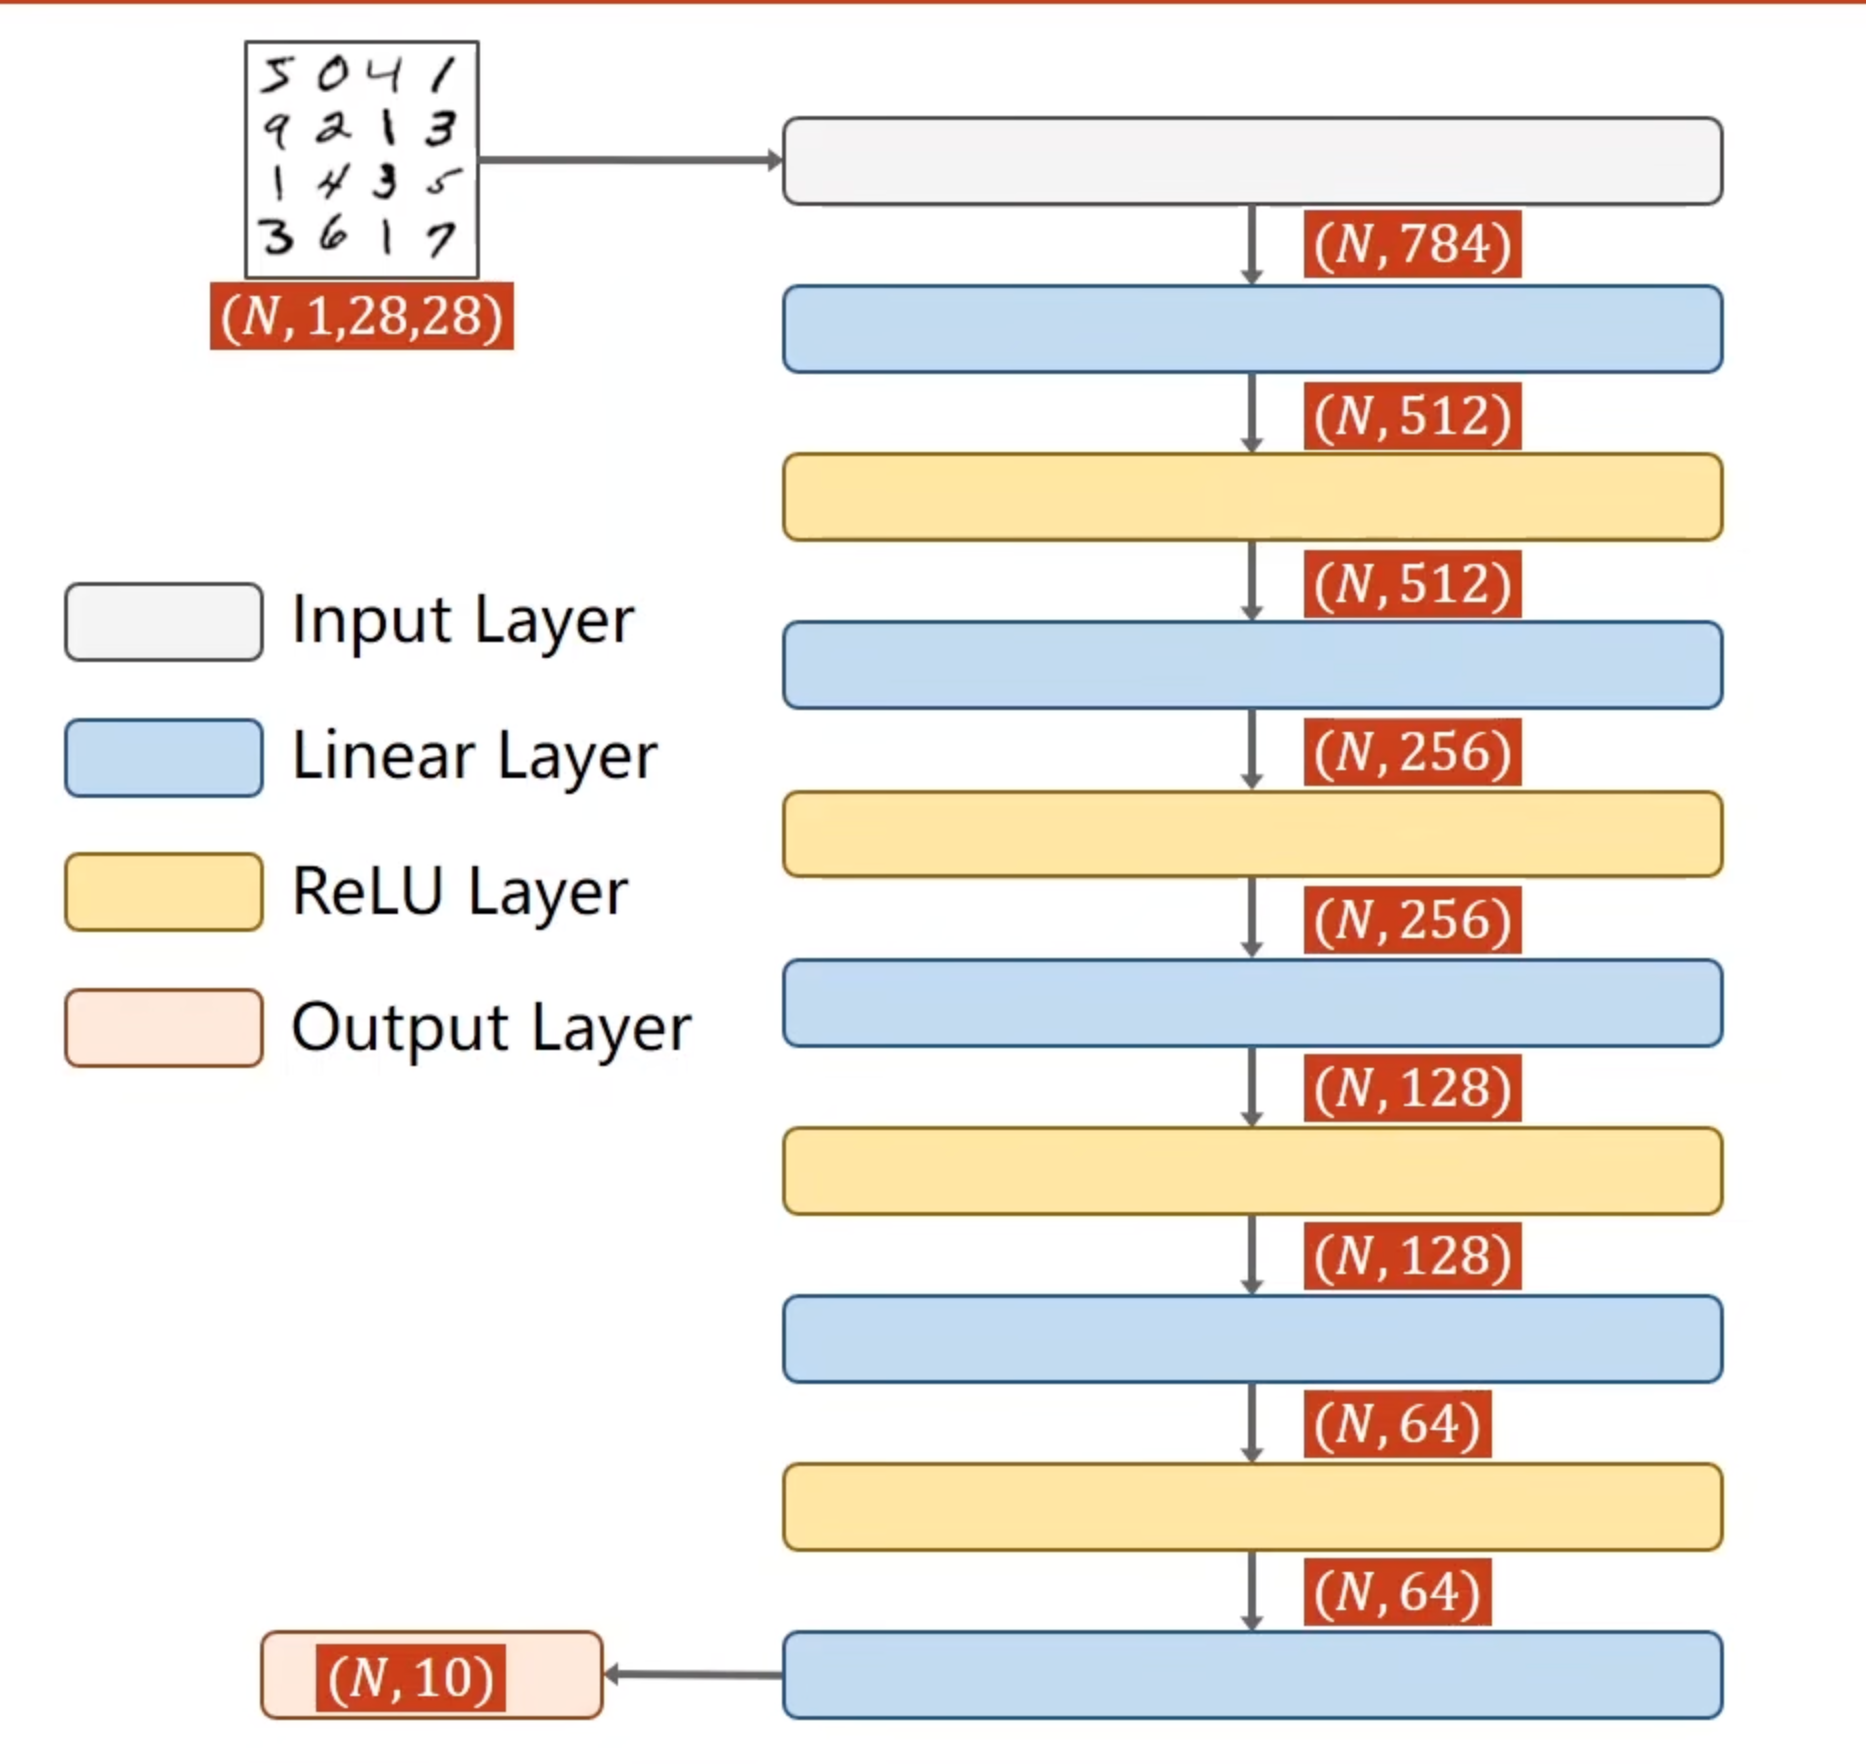

In [4]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.l1 = torch.nn.Linear(784,512)
        self.l2 = torch.nn.Linear(512,256)
        self.l3 = torch.nn.Linear(256,128)
        self.l4 = torch.nn.Linear(128,64)
        self.l5 = torch.nn.Linear(64,10)

    def forward(self,x):
        x = x.view(-1,784) # -1表示自动求解第一个维度的大小
        x = F.relu(self.l1(x)) # 激活函数采用relu
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        x = self.l5(x) # 注意最后一层不做激活
        return x

model = Net()

## construct loss and optimizer

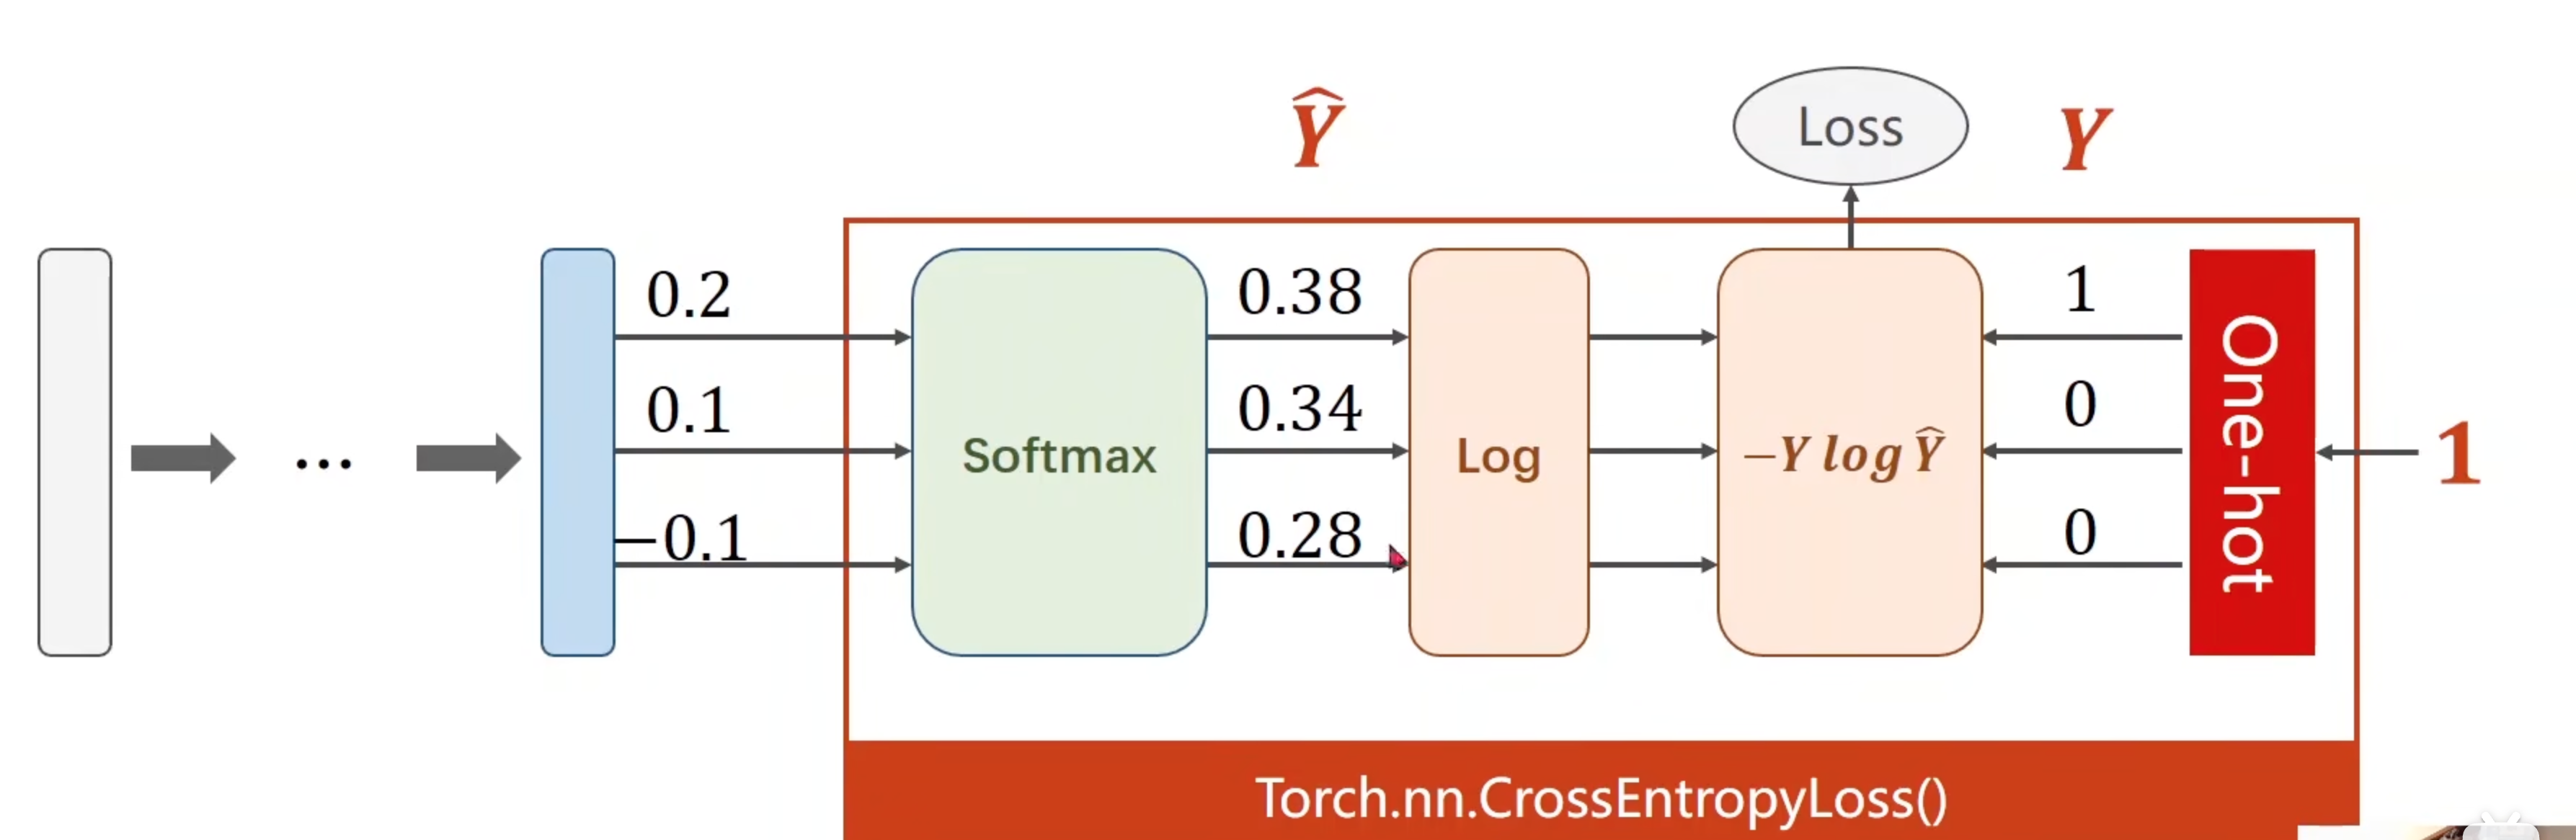

In [6]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.5)

## training cycle & test 

In [7]:
def train(epoch):
    running_loss = 0.0
    for batch_idx,data in enumerate(train_loader,0):
        inputs,target = data 
        optimizer.zero_grad()

        # forward
        outputs = model(inputs)
        loss = criterion(outputs,target)
        # backward
        loss.backward()
        # update
        optimizer.step()

        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d,%5d] loss:%.3f' % (epoch+1,batch_idx+1,running_loss/300))
            running_loss = 0.0

def test():
    correct = 0
    total = 0
    with torch.no_grad(): # 测试时不需要计算梯度
        for data in test_loader:
            images,labels = data 
            outputs = model(images)

            # 返回最大值和最大值的索引，最大值即意味着预测的数字
            _,predicted = torch.max(outputs.data,dim=1) 
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy on test set: %d %%' % (100*correct/total))

if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        test()

[1,  300] loss:2.137
[1,  600] loss:0.777
[1,  900] loss:0.401
Accuracy on test set: 89 %
[2,  300] loss:0.307
[2,  600] loss:0.260
[2,  900] loss:0.225
Accuracy on test set: 94 %
[3,  300] loss:0.178
[3,  600] loss:0.171
[3,  900] loss:0.148
Accuracy on test set: 95 %
[4,  300] loss:0.122
[4,  600] loss:0.125
[4,  900] loss:0.118
Accuracy on test set: 96 %
[5,  300] loss:0.095
[5,  600] loss:0.092
[5,  900] loss:0.090
Accuracy on test set: 97 %
[6,  300] loss:0.077
[6,  600] loss:0.074
[6,  900] loss:0.071
Accuracy on test set: 97 %
[7,  300] loss:0.057
[7,  600] loss:0.057
[7,  900] loss:0.066
Accuracy on test set: 97 %
[8,  300] loss:0.049
[8,  600] loss:0.048
[8,  900] loss:0.050
Accuracy on test set: 97 %
[9,  300] loss:0.040
[9,  600] loss:0.037
[9,  900] loss:0.041
Accuracy on test set: 97 %
[10,  300] loss:0.032
[10,  600] loss:0.032
[10,  900] loss:0.036
Accuracy on test set: 97 %
